In [1]:
%cd Utils

C:\Users\pasqu\Progetto_dataset_adult\Utils


*Importiamo le librerie necessarie*

In [27]:
#Librerie DS 
#import pandas as pd
#import numpy as np 

from sklearn.model_selection import StratifiedKFold, GridSearchCV
#from sklearn.compose import ColumnTransformer
#from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#Modello
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
#from sklearn.metrics import confusion_matrix, plot_confusion_matrix,classification_report
#from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
#Librerie proprie 
from Modello import *
from joblib import dump, load

*Importiamo il dataset*

In [3]:
dataset  = pd.read_csv("../Datasets/dataset_dopo_descrit").drop("Unnamed: 0", axis = 1)

*Dividiamo la X dalla Y*

In [4]:
X,Y = divisione_x_y(dataset, 'Reddito')

*Effettuiamo le dovute trasformazioni alle colonne. In particolare:*
* One Hot encoding : "Tipo_lavoro","Stato_sociale","Etnia","Genere","Reddito", "Paese_Nativo_cat"
* Ordinal encoding: "Istruzione"
    

In [5]:
categories = [[' No-Diploma',' HS-grad', ' Some-college',' Assoc-voc',
' Assoc-acdm',' Prof-school',' Bachelors',' Masters',' Doctorate']]

In [6]:
X_1, ct = trasformazioni_variabili(X,
["Tipo_lavoro","Stato_sociale","Etnia","Genere", "Paese_Nativo_cat"],
                    ["Istruzione"], categories, [], verbose = 0)

*Effettuiamo la divisione in train, test e validation*

In [7]:
X_train, X_test,X_val,Y_train, Y_test, Y_val = train_test_val(X_1,Y)

*Otteniamo le label e trasformiamo la y*

In [8]:
Y_train,Y_test, Y_val,le = label_encoder_val(Y_train,Y_test, Y_val)

*I dati sono adesso processabili*

### Modello 

*Albero di decisione*

La profondità dell' albero è 27
L'accuracy sul validation test è pari a 0.7954859511745739
L'accuracy sul test set è pari a 0.7910012285012284
Report completo sul test
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      4944
           1       0.58      0.47      0.52      1568

    accuracy                           0.79      6512
   macro avg       0.71      0.68      0.69      6512
weighted avg       0.78      0.79      0.78      6512

Di seguito la matrice di confusione:
[[4413  531]
 [ 830  738]]


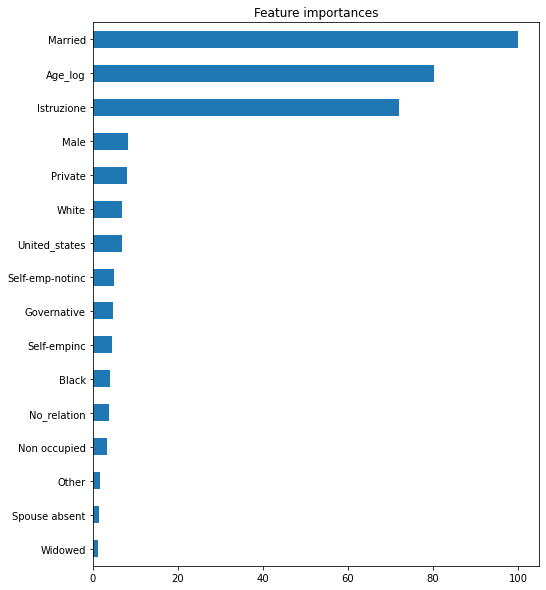

In [9]:
dtc, confusion_matrix= albero(X_train, Y_train, X_val, Y_val, X_test, Y_test,plot = False)

*Analisi degli iperparametri migliori con GridSearch*

In [10]:
estimator  = {"criterion":["gini","entropy"],"class_weight": [None, "balanced"],
           "ccp_alpha": [0, 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
                         0.045, 0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085,
                         0.09 , 0.095]}
gs = GridSearchCV(estimator = dtc, param_grid= estimator, 
                  scoring = "accuracy", n_jobs = -1)
gs.fit(X_val, Y_val)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'ccp_alpha': [0, 0.005, 0.01, 0.015, 0.02, 0.025, 0.03,
                                       0.035, 0.04, 0.045, 0.05, 0.055, 0.06,
                                       0.065, 0.07, 0.075, 0.08, 0.085, 0.09,
                                       0.095],
                         'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy']},
             scoring='accuracy')

La profondità dell' albero è 4
L'accuracy sul validation test è pari a 0.8200522032857362
L'accuracy sul test set è pari a 0.8166461916461917
Report completo sul test
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4944
           1       0.71      0.40      0.51      1568

    accuracy                           0.82      6512
   macro avg       0.77      0.68      0.70      6512
weighted avg       0.80      0.82      0.80      6512



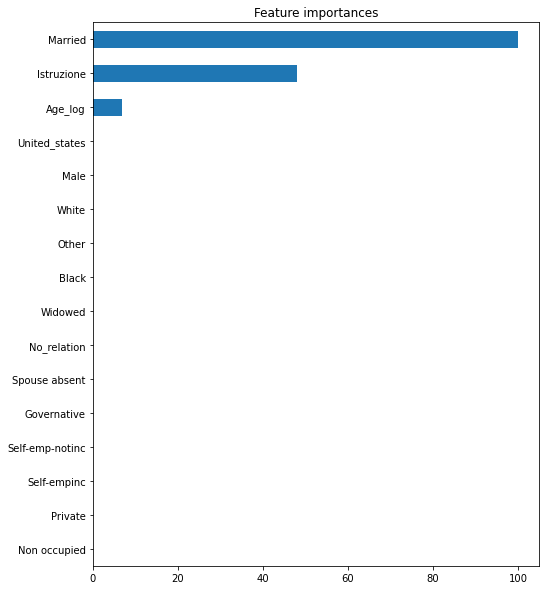

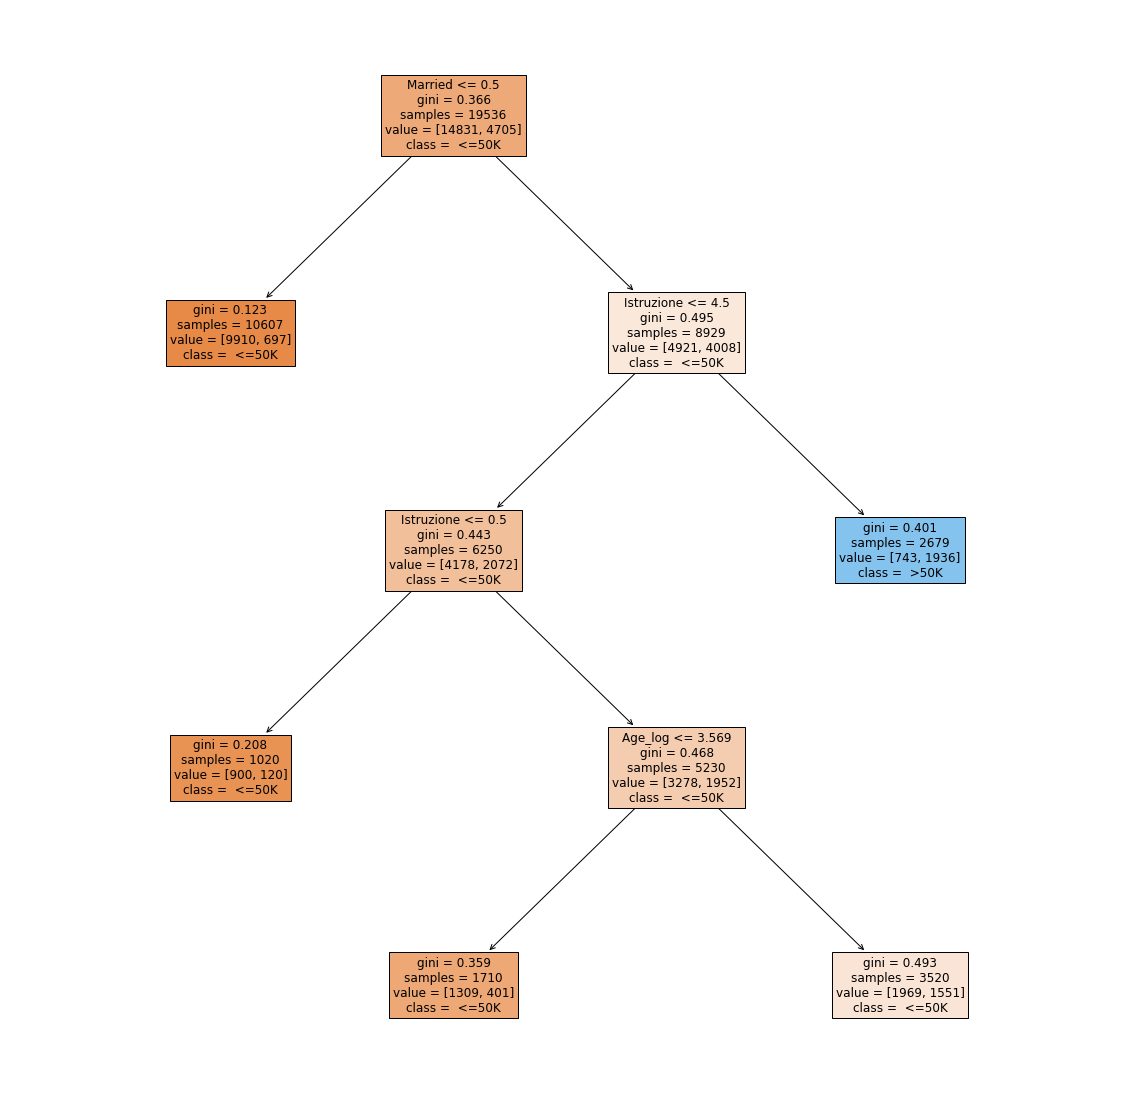

In [11]:
albero_ottimizzato = albero(X_train, Y_train, X_val, Y_val, X_test, Y_test, plot = True,
                           criterion = "gini", ccp_alpha = 0.005, class_names= le.classes_)

*Ensemble_models: Random Forest e Grid Search*

Di seguito la matrice di confusione:
[[4685  259]
 [ 935  633]]
L'accuracy sul validation test è pari a 0.800706279748196
L'accuracy sul test set è pari a 0.8051289926289926
Report completo sul test
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      4944
           1       0.61      0.52      0.56      1568

    accuracy                           0.81      6512
   macro avg       0.73      0.71      0.72      6512
weighted avg       0.80      0.81      0.80      6512

Di seguito la matrice di confusione:
[[4432  512]
 [ 757  811]]


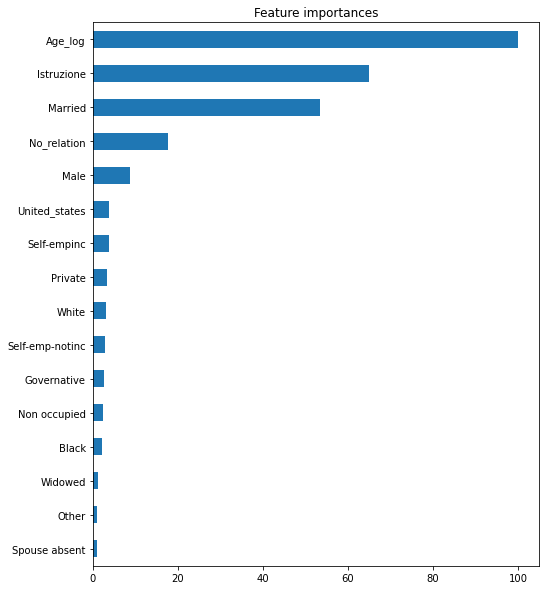

In [12]:
RF, confusion_matrix= random_forest(X_train, Y_train, X_val, Y_val, X_test, Y_test)

*Grid Search*

In [13]:
estimator  = { "n_estimators" : [100,200],"criterion":["gini","entropy"],
             "class_weight": ["balanced","balanced_subsample",None],
              "warm_start":["True","False"],
            "ccp_alpha": [0, 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
                         0.045, 0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085,
                         0.09 , 0.095]}

In [14]:
gs = GridSearchCV(estimator = RF, param_grid= estimator, 
                  scoring = "accuracy", n_jobs = -1)

In [15]:
#gs.fit(X_val, Y_val)
#gs.best_params_

*Dalla Grid Search i parametri migliori sono i seguenti:*
* ccp_alpha = 0.005
* class_weight = None
* criterion = 'entropy'
* n_estimators = 100 
* warm_start = True


L'accuracy sul validation test è pari a 0.8211269768155995
L'accuracy sul test set è pari a 0.816953316953317
Report completo sul test
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4944
           1       0.72      0.39      0.51      1568

    accuracy                           0.82      6512
   macro avg       0.78      0.67      0.70      6512
weighted avg       0.80      0.82      0.80      6512

Di seguito la matrice di confusione:
[[4702  242]
 [ 950  618]]


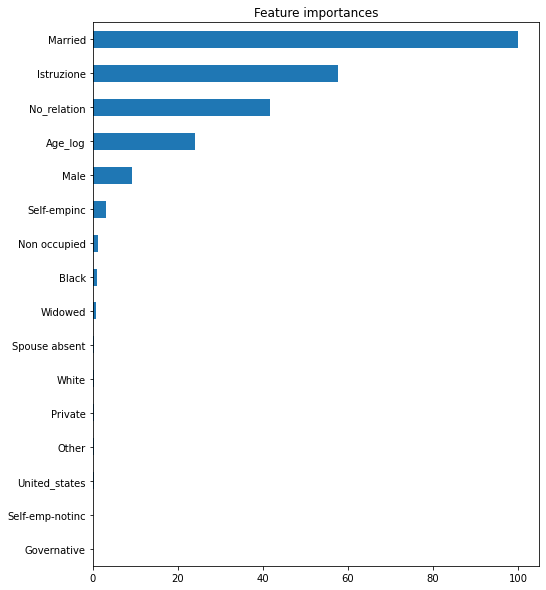

In [16]:
RF_ott, confusion_matrix_ott= random_forest(X_train, Y_train, X_val, Y_val, X_test, Y_test,
                              ccp_alpha = 0.005,class_weight = None, criterion = 'entropy',
                              n_estimators = 100, warm_start = True)

*AdaBoost e grid Search*

*Utilizziamo in questo caso la cross-validation (La velocità dell'algoritmo permette di utilizzare una K-fold cross validation piuttosto che una divisione in Train,test e validation)*

In [17]:
X_train_1, X_test_1,Y_train_1,Y_test_1 = train_test_val(X_1,Y, validation= False, test_size = 0.40)
Y_train_1,Y_test_1,le = label_encoder_test(Y_train_1,Y_test_1)

L'accuracy sul test set è pari a 0.828253358925144
Report completo sul test
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      9888
           1       0.69      0.51      0.59      3137

    accuracy                           0.83     13025
   macro avg       0.78      0.72      0.74     13025
weighted avg       0.82      0.83      0.82     13025

Di seguito la matrice di confusione:
[[9178  710]
 [1527 1610]]


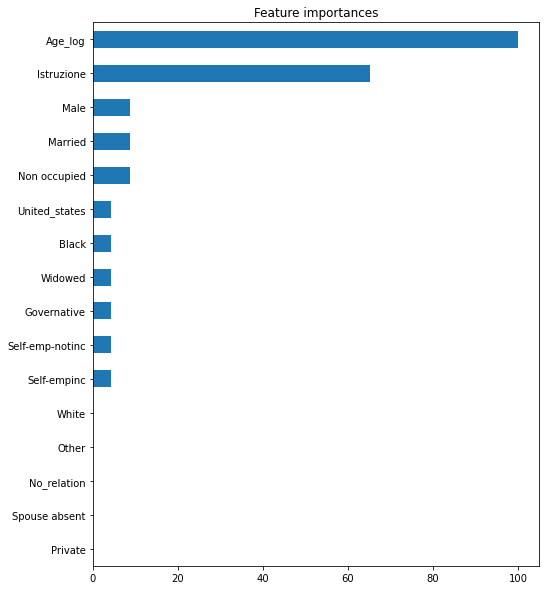

In [18]:
Ada, conf = adaboost(X_train_1,Y_train_1,X_test_1, Y_test_1)

*Grid search*

In [19]:
kf = StratifiedKFold()
estimator = {"n_estimators" : [70,80,90,100,120,130],
             "base_estimator" : [DecisionTreeClassifier(max_depth = 1, criterion = "entropy"),
                                 DecisionTreeClassifier(max_depth = 1)],
            "learning_rate": [0.4,0.8,1,1.2,1.3]}

In [20]:
GS_ada = GridSearchCV(Ada,param_grid= estimator,cv = kf)

In [21]:
#GS_ada.fit(X_train_1,Y_train_1)
#GS_ada.best_params_

*I migliori parametri sono i seguenti:*
* 'base_estimator' = DecisionTreeClassifier(criterion='entropy', max_depth=1)
* learning_rate = 1
* n_estimators = 80 

L'accuracy sul test set è pari a 0.8285604606525911
Report completo sul test
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      9888
           1       0.69      0.51      0.59      3137

    accuracy                           0.83     13025
   macro avg       0.78      0.72      0.74     13025
weighted avg       0.82      0.83      0.82     13025

Di seguito la matrice di confusione:
[[9177  711]
 [1522 1615]]


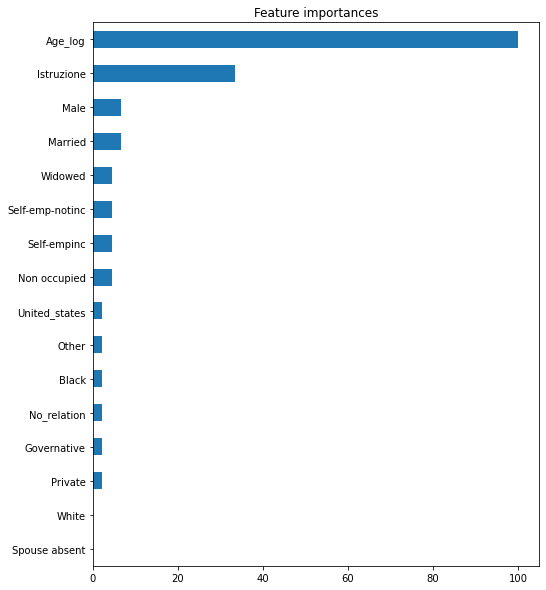

In [22]:
Ada_ottimizzato, confusion_matrix_ada = adaboost(X_train_1, Y_train_1, X_test_1, Y_test_1,
                                        base_estimator = DecisionTreeClassifier(criterion = "entropy",
                                                                               max_depth = 1),
                                                learning_rate= 1, n_estimators=80)

*Dati i due ensemble models, l'adaboost è quello che ci restiuisce delle valutazioni migliori, quindi lo preferiamo*

*Dall' adaboost si osserva come:*
* Age_loc abbia un'importanza molto più alta nella spiegazione del fenomeno
* L'istruzione è la seconda variabile più importante

*Salviamo il modello*

In [25]:
#dump(Ada_ottimizzato, "Adaboost_ottimizzato.sav")

['Adaboost_ottimizzato.sav']

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=1),
                   learning_rate=1, n_estimators=80, random_state=42)